# **Simulation Preparation**

## Check allocated GPU information

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('GPU accelerator is not enabled. Do the step 2 above.')
else:
  print(gpu_info)

Tue Jan 10 18:31:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

## Showing running time (for each cell)

In [3]:
!pip install ipython-autotime
%load_ext autotime

time: 467 µs (started: 2023-01-10 18:32:09 +00:00)


## Installing PyMOL for visualization tool

In [4]:
!pip install py3Dmol

time: 10 s (started: 2023-01-10 18:32:09 +00:00)


# Part 0 – **Downloading and Installing GROMACS**

## Downloading GROMACS installation files

Insert the download URL *below* (for other version than GROMACS 2022.4).\
Get the URL from download website (https://manual.gromacs.org/current/download.html).

In [5]:
# Input the download URL as string here:
URL = 'https://ftp.gromacs.org/gromacs/gromacs-2022.4.tar.gz' 

!wget {URL}

--2023-01-10 18:32:20--  https://ftp.gromacs.org/gromacs/gromacs-2022.4.tar.gz
Resolving ftp.gromacs.org (ftp.gromacs.org)... 130.237.11.165, 2001:6b0:1:1191:216:3eff:fec7:6e30
Connecting to ftp.gromacs.org (ftp.gromacs.org)|130.237.11.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40352282 (38M) [application/x-gzip]
Saving to: ‘gromacs-2022.4.tar.gz’

gromacs-2022.4.tar. 100%[===================>]  38.48M  16.4MB/s    in 2.4s    

2023-01-10 18:32:23 (16.4 MB/s) - ‘gromacs-2022.4.tar.gz’ saved [40352282/40352282]

time: 3.97 s (started: 2023-01-10 18:32:19 +00:00)


## Installing GROMACS

Extracting and installing GROMACS onto user-defined folder (takes ~ 1.5 hour).

In [6]:
%%bash

# Input the install prefix as string here:
install_prefix = "gromacs-2022"

# Extract the downloaded folder containing GROMAC
tar xfz gromacs-2022.4.tar.gz

# Create a "build" folder inside the extracted folder
cd gromacs-2022.4
mkdir build

# Setup installation options, including GPU and a user-defined folder
cd build
cmake .. -DGMX_BUILD_OWN_FFTW=ON -DGMX_GPU=CUDA -DREGRESSIONTEST_DOWNLOAD=ON -DCMAKE_INSTALL_PREFIX=/content/$install_prefix

# Compile GROMACS and install it inside the user-defined folder
make
make check
make install

-- The C compiler identification is GNU 9.4.0
-- The CXX compiler identification is GNU 9.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found Python3: /opt/conda/bin/python3.7 (found suitable version "3.7.12", minimum required is "3.7") found components: Interpreter Development Development.Module Development.Embed 
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Performing Test CFLAGS_WARN_NO_MISSING_FIELD_INITIALIZERS
-- Performing Test CFLAGS_WARN_NO_MISSING_FIELD_INITIALIZERS - Success
-- Performing Test CFLAGS_EXCES

bash: line 3: install_prefix: command not found
Downloading: https://ftp.gromacs.org/regressiontests/regressiontests-2022.4.tar.gz
/kaggle/working/gromacs-2022.4/build/src/external/build-fftw/fftwBuild-prefix/src/fftwBuild/configure: line 8273: /usr/bin/file: No such file or directory
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see `U')
ar: `u' modifier ignored since `D' is the default (see

time: 1h 19min 11s (started: 2023-01-10 18:32:23 +00:00)


## Check the installation was successful *(optional)*

In [7]:
%%bash
source /content/gromacs-2022/bin/GMXRC

gmx -h

bash: line 1: /content/gromacs-2022/bin/GMXRC: No such file or directory
bash: line 3: gmx: command not found


CalledProcessError: Command 'b'source /content/gromacs-2022/bin/GMXRC\n\ngmx -h\n'' returned non-zero exit status 127.

time: 167 ms (started: 2023-01-10 19:51:35 +00:00)


If GROMACS was succesfully installed, the *initial* output from `gmx -h` will look like:

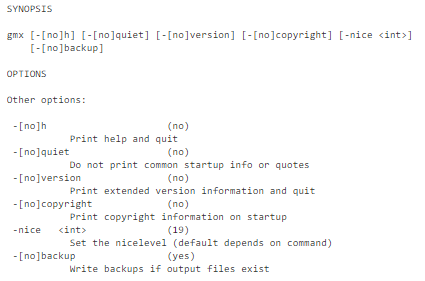

# Part I – **Setting Up the MD Simulation System**

The initial steps of setting up a system for MD simulations are (make sure the input molecules have *\"cleaned\"* atomic coordinates):
1. **Parameterizing** the atoms building up system.
2. **Solvating** the aptamer and adding the protein.
3. **Adding** counterions to neutralize the global charge of the system.

## Part I.1 – **Getting the input atomic coordinates file**

### Making the working directory and uploading input files

In [ ]:
import os

# Create the folder using the os.mkdir() command
# and check whether the folder already exists
if os.path.exists('md01'):
    print("Path already exists.")
if not os.path.exists('md01'):
    os.mkdir('md01')
    print("Path was succesfully created.")

os.chdir('md01')

### Uploading PDB file of aptamer and protein structure

Make sure the uploaded file are ***cleaned* molecule** (without water or missing residues/atoms)

> **File > Upload Data > Upload Apt22.pdb and Protein.pdb**

In [ ]:
# Input the aptamer and protein file path as string here:
aptamer_file = "/kaggle/input/mdlab-input/Apt22.pdb"
protein_file = "/kaggle/input/mdlab-input/Protein.pdb"

### Visualizing the aptamer

In [ ]:
import py3Dmol
view=py3Dmol.view()
view.addModel(open(aptamer_file, 'r').read(), 'pdb')
view.setStyle({"cartoon": {'color':'spectrum'}})
view.zoomTo()
view.show()

### Visualizing the protein

In [ ]:
import py3Dmol
view=py3Dmol.view()
view.addModel(open(protein_file, 'r').read(), 'pdb')
view.setStyle({"cartoon": {'color':'spectrum'}})
view.zoomTo()
view.show()

## Part I.2 – **Parameterizing the atoms building up simulation system**

### Parameterizing aptamer

In [ ]:
%%bash -s "$aptamer_file"
source /content/gromacs-2022/bin/GMXRC

# Trick to provide interactive options to gmx
echo "6" > options # Select force field = `6: AMBER99SB-ILDN protein, nucleic AMBER94 (Lindorff-Larsen et al., Proteins 78, 1950-58, 2010)`
echo "1" >> options # Select water model = `1: TIP3P     TIP 3-point, recommended`

# Using pdb2gmx to parameterize PDB with the selected force field and water model
gmx pdb2gmx -f "$1" -o Apt_processed.gro -ignh < options

### Parameterizing protein

In [ ]:
%%bash -s "$protein_file"
source /content/gromacs-2022/bin/GMXRC

# Trick to provide interactive options to gmx
echo "6" > options # Select force field = `6: AMBER99SB-ILDN protein, nucleic AMBER94 (Lindorff-Larsen et al., Proteins 78, 1950-58, 2010)`
echo "1" >> options # Select water model = `1: TIP3P     TIP 3-point, recommended`

# Using pdb2gmx to parameterize PDB with the selected force field and water model
gmx pdb2gmx -f "$1" -o protein_processed.gro -ignh < options

### Making the GRO file of aptamer-protein complex system

In [ ]:
%%bash

# Copying protein_processed.gro and rename to complex.gro
cp protein_processed.gro complex0.gro

# Add aptamer atoms to complex system
# 1. Taking only atom coordinate from Apt_processed.gro to temp.gro
sed '1,2d;$d' Apt_processed.gro > temp.gro
# 2. Getting total lines in complex.gro
x=$(wc -l < "complex0.gro")
# 3. Adding all temp.gro to before the last line of complex.gro
((y = $x-1))
sed -e "${y}r temp.gro" complex0.gro > complex.gro


# Updating the total number of atoms in second line
# 1. Getting the total number of atoms from each molecule
a=$(sed '2q;d' Apt_processed.gro)
b=$(sed '2q;d' protein_processed.gro)
# 2. Adding both valus
((c = $a + $b))
# 3. Updating the value in complex.gro second line
sed -i "2s/$b/$c/" complex.gro

### Visualizing the aptamer-protein complex system

In [ ]:
import py3Dmol
view=py3Dmol.view()
view.addModel(open('complex.gro', 'r').read(), 'gro')
view.setStyle({"cartoon": {'color':'spectrum'}})
view.zoomTo()
view.show()

### Making aptamer topologi include file (**`atp.itp`**)

In [ ]:
%%bash

# Copying topology aptamer to ITP file
cp '#topol.top.1#' apt0.itp

# Removing unnecessary information in apt.itp
x1=$(grep -wn "moleculetype" apt0.itp | cut -d: -f1)
((y1 = $x1-1))
sed "1,${y1}d" apt0.itp > apt1.itp
x2=$(grep -wn "; Include Position restraint file" apt1.itp | cut -d: -f1)
y2=$(wc -l < "apt1.itp")
sed "${x2},${y2}d" apt1.itp > apt.itp

# Changing aptamer molecule name to 'DNA'
x3=$(sed '3q;d' apt.itp | cut -d' ' -f1)
sed -i "3s/$x3/DNA/" apt.itp

### Updating the topology file (`topol.top`) of aptamer-protein complex system

In [ ]:
%%bash

# Adding aptamer topology include file information
x1=$(grep -wn "; Include water topology" topol.top | cut -d: -f1)
((y1 = $x1-1))
printf '%s\n' '; Include aptamer topology' '# include "apt.itp"' '' > temp.gro
sed -i -e "${y1}r temp.gro" topol.top

# Adding aptamer molecule
x2=$(wc -l < "topol.top")
printf '%s\n' 'DNA               1' > temp.gro
sed -i -e "${x2}r temp.gro" topol.top

## Part I.3 – **Solvating the simulation system**

### Generating a periodic box using `editconf`

In [ ]:
%%bash
source /content/gromacs-2022/bin/GMXRC

# Create a cubic box with 1.0 nm padding for solvated system
gmx editconf -f complex.gro -o newbox.gro -bt dodecahedron -c -d 1.0

### Solvating the simulation box with water molecules

In [ ]:
%%bash
source /content/gromacs-2022/bin/GMXRC

# Fill up the box with water molecules
gmx solvate -cp newbox.gro -cs spc216.gro -o solv.gro -p topol.top

## Part I.4 – **Neutralize the global charge of the system**

### Generating an atomic-level input (TPR file)

The TPR file contains all the parameters for all of the atoms in the system.

In [ ]:
%%bash
source /content/gromacs-2022/bin/GMXRC

# Getting the parameter file
wget https://raw.githubusercontent.com/donnymarcius/Aptamer-MD-Lab/main/mdp/ions.mdp

# Add counterions to the system
gmx grompp -f ions.mdp -c solv.gro -p topol.top -o ions.tpr

### Replacing water molecules (SOL) with the counterions

In [ ]:
%%bash
source /content/gromacs-2022/bin/GMXRC

# This is a trick to provide interactive options to gmx
echo "SOL" > options

# Randomly replacing water molecules in the system with an appropriate number and type of ions
gmx genion -s ions.tpr -o solv_ions.gro -p topol.top -pname NA -nname CL -neutral < options

# Part II – **Energy Minimization of the MD System**

## Minimizing energy of the simulation system

To check or adjust the EM simulation parameters, change manually in **em.mdp** file.

In [ ]:
%%bash
source /content/gromacs-2022/bin/GMXRC

# Getting the parameter file
wget https://raw.githubusercontent.com/donnymarcius/Aptamer-MD-Lab/main/mdp/em.mdp

# Prepare minimization MD
gmx grompp -f em.mdp -c solv_ions.gro -p topol.top -o em.tpr

# Run the minimization
gmx mdrun -v -deffnm em

## Extracting potential energy during the EM step

The output will be `potential.xvg`.

In [ ]:
%%bash
source /content/gromacs-2022/bin/GMXRC

# This is a trick to provide interactive options to gmx
echo "Potential" > options

# Extract the potential energy of the system
gmx energy -f em.edr -o potential.xvg -xvg none < options

## Plotting the potential energy of the system

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

data = np.loadtxt('potential.xvg')

plt.title('Potential Energy during Minimization')
plt.xlabel('Energy Minimization Step')
plt.ylabel(r'E$_P$ [kJ•mol$^{-1}]$')
plt.plot(data[:,0], data[:,1], linestyle='solid', linewidth='2') 
plt.show()

# Part III – **Restraining Aptamer Position**

## Creating index group for aptamer which contains only its non-hydrogen atoms

In [ ]:
%%bash
source /content/gromacs-2022/bin/GMXRC

# This is a trick to provide interactive options to gmx
echo "0 & ! a H*" > options
echo "q" >> options

gmx make_ndx -f Apt_processed.gro -o index_apt.ndx < options

## Selecting the newly created index group

In [ ]:
%%bash
source /content/gromacs-2022/bin/GMXRC

# This is a trick to provide interactive options to gmx
echo "2" > options

gmx genrestr -f Apt_processed.gro -n index_apt.ndx -o posre_apt.itp -fc 1000 1000 1000 < options

## Including the information in topology file (`topol.top`)

In [ ]:
%%bash

# Adding aptamer topology include file information
x1=$(grep -wn "; Include water topology" topol.top | cut -d: -f1)
((y1 = $x1-1))
printf '%s\n' '; Include aptamer position restraints file' '# ifdef POSRES' '# include "posre_apt.itp"' '# endif' '' > temp.gro
sed -i -e "${y1}r temp.gro" topol.top

# Part IV – **Equilibration of the MD System**

## Grouping protein and aptamer for temperature coupling

In [ ]:
%%bash
source /content/gromacs-2022/bin/GMXRC

# This is a trick to provide interactive options to gmx
echo "1 | 12" > options
echo "q" >> options

gmx make_ndx -f em.gro -o index.ndx < options

## Equilibrating the temperature (NVT) of simulation system

To check or adjust the NVT simulation parameters, change manually in **nvt.mdp** file.

In [ ]:
%%bash
source /content/gromacs-2022/bin/GMXRC

# Getting the parameter file
wget https://raw.githubusercontent.com/donnymarcius/Aptamer-MD-Lab/main/mdp/nvt.mdp

# Prepare NVT equilibration MD
gmx grompp -f nvt.mdp -c em.gro -r em.gro -p topol.top -n index.ndx -o nvt.tpr

# Run the simulation
gmx mdrun -v -deffnm nvt -nb gpu

## Extracting temperature during the NVT equlibration

The output will be `temperature.xvg`.

In [ ]:
%%bash
source /content/gromacs-2022/bin/GMXRC

# This is a trick to provide interactive options to gmx
echo "Temperature" > options

# Extract the temperature of the system during the NVT equilibration MD
gmx energy -f nvt.edr -o temperature.xvg -xvg none < options

## Plotting the temperature of the system

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

data = np.loadtxt('temperature.xvg')

plt.title('Temperature during 0.1 ns Equilibration (NVT)')
plt.xlabel('Time (ps)')
plt.ylabel('Temperature [K]')
plt.plot(data[:,0], data[:,1], linestyle='solid', linewidth='2') 
plt.show()

## Equilibrating the pressure (NPT) of simulation system

To check or adjust the NPT simulation parameters, change manually in **npt.mdp** file.

In [ ]:
%%bash
source /content/gromacs-2022/bin/GMXRC

# Getting the parameter file
wget https://raw.githubusercontent.com/donnymarcius/Aptamer-MD-Lab/main/mdp/npt.mdp

# Prepare NPT equilibration MD
gmx grompp -f npt.mdp -c nvt.gro -r nvt.gro -t nvt.cpt -p topol.top -n index.ndx -o npt.tpr -maxwarn 1

# Run the simulation
gmx mdrun -v -deffnm npt -nb gpu

## Extracting pressure during the NPT equlibration

The output will be `pressure.xvg`.

In [ ]:
%%bash
source /content/gromacs-2022/bin/GMXRC

# This is a trick to provide interactive options to gmx
echo "Pressure" > options

# Extract the pressure of the system during the NPT equilibration MD
gmx energy -f npt.edr -o pressure.xvg -xvg none < options

## Plotting the pressure of the system

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

data = np.loadtxt('pressure.xvg')

plt.title('Pressure during 0.1 ns Equilibration (NPT)')
plt.xlabel('Time (ps)')
plt.ylabel('Pressure [bar]')
plt.plot(data[:,0], data[:,1], linestyle='solid', linewidth='2') 
plt.show()

## Extracting density during the NPT equlibration

The output will be `density.xvg`.

In [ ]:
%%bash
source /content/gromacs-2022/bin/GMXRC

# This is a trick to provide interactive options to gmx
echo "Density" > options

# Extract the density of the system during the NPT equilibaration MD
gmx energy -f npt.edr -o density.xvg -xvg none < options

## Plotting the density of the system

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

data = np.loadtxt('density.xvg')

plt.title('Density during 0.1 ns Equilibration (NPT)')
plt.xlabel('Time (ps)')
plt.ylabel('Density [kg•m$^{-3}$]')
plt.plot(data[:,0], data[:,1], linestyle='solid', linewidth='2') 
plt.show()

# Part V – **The Production of Molecular Dynamics**

## MD production of simulation system

In [ ]:
%%bash

# Getting the parameter file
wget https://raw.githubusercontent.com/donnymarcius/Aptamer-MD-Lab/main/mdp/md50.mdp

source /content/gromacs-2022/bin/GMXRC

# Prepare production MD
gmx grompp -f md50.mdp -c npt.gro -t npt.cpt -p topol.top -n index.ndx -o md_0_10.tpr

# Run the simulation
gmx mdrun -v -deffnm md_0_10 -nb gpu

## Making the ZIP file of MD result files

In [ ]:
import os

os.chdir("/kaggle/working/")
!zip -r md01.zip "md01"
os.chdir("/kaggle/working/md01")

## Dowloading the ZIP file via link

In [ ]:
from IPython.display import FileLink
FileLink(r'md01.zip')

# Click hyperlink below to download the file